In [11]:

# ! KEY CODE
import datasets as huggingface_datasets
import torchvision

dataset = huggingface_datasets.load_dataset("zh-plus/tiny-imagenet")
print(huggingface_datasets.get_dataset_split_names("zh-plus/tiny-imagenet"))
training_dataset, validation_dataset = dataset['train'], dataset['valid']


['train', 'valid']


In [18]:
training_dataset[10]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [20]:

transformations_list = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])

def transform_datasets(examples):
    examples["converted_tensors"] = []
    
    for image in examples['image']:
        transformed_image = transformations_list(image)
        examples['converted_tensors'].append(transformed_image)
    
    return examples
 
training_dataset.set_transform(transform_datasets)
validation_dataset.set_transform(transform_datasets)

In [ ]:
from datasets import DownloadConfig
ds = huggingface_datasets.load_dataset("imagenet-1k", download_config=DownloadConfig(resume_download=True))

In [13]:
example = training_dataset[0]

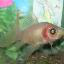

In [15]:
example['image']

In [16]:
example['label']

0

In [17]:
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [25]:
import torch, torch.nn as nn
from torchinfo import summary

simple_model = nn.Sequential(
    nn.Conv2d(out_channels = 50, in_channels = 3, kernel_size = (64, 64) ),
    nn.ReLU(),

    nn.Flatten(start_dim=1),
    
    nn.Linear(out_features = 10, in_features = 50)
)

from torchinfo import summary
summary(simple_model, input_size=(1,3,64,64), 
        verbose=2, col_names = ["input_size", "output_size","kernel_size", "num_params","trainable", "params_percent"]);

Layer (type:depth-idx)                   Input Shape               Output Shape              Kernel Shape              Param #                   Trainable                 Param %
Sequential                               [1, 3, 64, 64]            [1, 10]                   --                        --                        True                           --
├─Conv2d: 1-1                            [1, 3, 64, 64]            [1, 50, 1, 1]             [64, 64]                  614,450                   True                       99.92%
│    └─weight                                                                                [3, 50, 64, 64]           ├─614,400
│    └─bias                                                                                  [50]                      └─50
├─ReLU: 1-2                              [1, 50, 1, 1]             [1, 50, 1, 1]             --                        --                        --                             --
├─Flatten: 1-3                 

/Users/ajinkya/opt/anaconda3/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),


In [ ]:
import torch, torch.nn as nn

class Custom_Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(out_channels = 5, in_channels = 3, kernel_size = (64, 64) )
        self.layer2 = nn.Linear(out_features = 8, in_features = 5)

    def forward(self, input_batch):
        layer1_output = self.layer1(input_batch)
        # layer1_output = torch.dot(input_batch, self.layer1.weight)

        activation_function_output = nn.functional.relu(layer1_output)

        layer2_output = self.layer2(activation_function_output)
        activation_function_output = nn.functional.relu(layer2_output)

        return activation_function_output

model = Custom_Model()

single_random_batch = torch.randn(1,3,64,64)
model(single_random_batch)